In [63]:
%matplotlib inline

# Some usual imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sbs
import plotly.express as px
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import warnings
warnings.filterwarnings(action='ignore')


# Imports in order to be able to use Plotly offline.
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# 1 Data wrangling

In [64]:
coal = pd.read_csv('coal.csv', header = 0)
#coal['Month']=pd.to_datetime(coal['Month'], format=" %b/%d/%Y").dt.date
coal = coal.drop(['Change'], axis = 1)
coal = coal.rename(columns ={'Price' : 'coal_price'})
coal.head()

,Month,coal_price
0,8/1/1995,40.88
1,9/1/1995,40.93
2,10/1/1995,40.97
3,11/1/1995,39.59
4,12/1/1995,39.35


In [65]:
crude = pd.read_csv('crude_oil20y.csv', header = 0)
crude = crude.drop(['Change'], axis = 1)
crude = crude.rename(columns ={'Price' : 'crude_price'})
x = crude['Month']
crude.head()

,Month,crude_price
0,8/1/1995,16.07
1,9/1/1995,16.78
2,10/1/1995,16.12
3,11/1/1995,16.88
4,12/1/1995,17.96


In [66]:
ngas = pd.read_csv('ng.csv', header = 0)
ngas = ngas.drop(['Change'], axis = 1)
ngas = ngas.rename(columns ={'Price' : 'ngas_price'})
ngas.head()

,Month,ngas_price
0,8/1/1995,1.56
1,9/1/1995,1.64
2,10/1/1995,1.77
3,11/1/1995,2.04
4,12/1/1995,2.71


In [67]:
gold = pd.read_csv('gold.csv', header = 0)
gold = gold.drop(['Change'], axis = 1)
gold = gold.rename(columns ={'Price' : 'gold_price'})
gold.head()

,Month,gold_price
0,8/1/1995,383.67
1,9/1/1995,383.06
2,10/1/1995,383.14
3,11/1/1995,385.31
4,12/1/1995,387.44


In [68]:
iron = pd.read_csv('iron ore.csv', header = 0)
iron = iron.drop(['Change'], axis = 1)
iron = iron.rename(columns ={'Price' : 'iron_price'})
iron.head()

,Month,iron_price
0,8/1/1995,28.38
1,9/1/1995,28.38
2,10/1/1995,28.38
3,11/1/1995,28.38
4,12/1/1995,28.38


In [104]:
aud_usd = pd.read_csv('AUD_USD1.csv', header = 0 )
aud_usd = aud_usd.drop(['Open', 'High','Low', 'Change %'], axis = 1)
aud_usd = aud_usd.rename( columns = {'Price': 'aud_usd_closed',
                                     'Date' : 'Month'})
#aud_usd['Month'] =  pd.to_datetime(aud_usd['Month'], format = "%b %y").dt.date
aud_usd.tail(20)

,Month,aud_usd_closed
293,Jun 18,0.7405
294,Jul 18,0.7429
295,Aug 18,0.7191
296,Sep 18,0.7230
297,Oct 18,0.7074
298,Nov 18,0.7318
299,Dec 18,0.7052
300,Jan 19,0.7273
301,Feb 19,0.7095
302,Mar 19,0.7097


In [70]:
aud_usd['Month'] = pd.to_datetime(aud_usd['Month'], format = '%b %y')
aud_usd.head(20)


,Month,aud_usd_closed
0,1994-01-01,0.7087
1,1994-02-01,0.7131
2,1994-03-01,0.7041
3,1994-04-01,0.7152
4,1994-05-01,0.7373
5,1994-06-01,0.7274
6,1994-07-01,0.7399
7,1994-08-01,0.7429
8,1994-09-01,0.7399
9,1994-10-01,0.7429


In [71]:
coal_crude = pd.merge(coal, crude, how = 'outer', on = 'Month')
print(coal_crude.shape[0]- coal_crude.count() )
coal_crude.head()

Month          0
coal_price     0
crude_price    0
dtype: int64


,Month,coal_price,crude_price
0,8/1/1995,40.88,16.07
1,9/1/1995,40.93,16.78
2,10/1/1995,40.97,16.12
3,11/1/1995,39.59,16.88
4,12/1/1995,39.35,17.96


In [72]:
plus_ngas = pd.merge(coal_crude,ngas, how = 'outer', on = 'Month')
print(plus_ngas.shape[0]- plus_ngas.count() )
plus_ngas.head()

Month          0
coal_price     0
crude_price    0
ngas_price     0
dtype: int64


,Month,coal_price,crude_price,ngas_price
0,8/1/1995,40.88,16.07,1.56
1,9/1/1995,40.93,16.78,1.64
2,10/1/1995,40.97,16.12,1.77
3,11/1/1995,39.59,16.88,2.04
4,12/1/1995,39.35,17.96,2.71


In [73]:
plus_gold = pd.merge(plus_ngas,gold, how = 'outer', on = 'Month')
print(plus_gold.shape[0]- plus_gold.count() )
plus_gold.head(150)

Month          0
coal_price     0
crude_price    0
ngas_price     0
gold_price     0
dtype: int64


,Month,coal_price,crude_price,ngas_price,gold_price
0,8/1/1995,40.88,16.07,1.56,383.67
1,9/1/1995,40.93,16.78,1.64,383.06
2,10/1/1995,40.97,16.12,1.77,383.14
3,11/1/1995,39.59,16.88,2.04,385.31
4,12/1/1995,39.35,17.96,2.71,387.44
...,...,...,...,...,...
145,9/1/2007,68.44,77.13,6.10,712.65
146,10/1/2007,74.81,82.86,6.80,754.60
147,11/1/2007,84.60,92.53,7.14,806.25
148,12/1/2007,91.00,91.45,7.15,803.20


In [74]:
plus_iron = pd.merge(plus_gold,iron, how = 'outer', on = 'Month')
print(plus_iron.shape[0]- plus_iron.count() )
plus_iron.head(150)

Month          0
coal_price     0
crude_price    0
ngas_price     0
gold_price     0
iron_price     0
dtype: int64


,Month,coal_price,crude_price,ngas_price,gold_price,iron_price
0,8/1/1995,40.88,16.07,1.56,383.67,28.38
1,9/1/1995,40.93,16.78,1.64,383.06,28.38
2,10/1/1995,40.97,16.12,1.77,383.14,28.38
3,11/1/1995,39.59,16.88,2.04,385.31,28.38
4,12/1/1995,39.35,17.96,2.71,387.44,28.38
...,...,...,...,...,...,...
145,9/1/2007,68.44,77.13,6.10,712.65,148.65
146,10/1/2007,74.81,82.86,6.80,754.60,168.11
147,11/1/2007,84.60,92.53,7.14,806.25,195.09
148,12/1/2007,91.00,91.45,7.15,803.20,190.12


In [76]:
plus_iron['Month'] = pd.to_datetime(plus_iron['Month'], format = '%m/%d/%Y')
plus_iron.head(10)

,Month,coal_price,crude_price,ngas_price,gold_price,iron_price
0,1995-08-01,40.88,16.07,1.56,383.67,28.38
1,1995-09-01,40.93,16.78,1.64,383.06,28.38
2,1995-10-01,40.97,16.12,1.77,383.14,28.38
3,1995-11-01,39.59,16.88,2.04,385.31,28.38
4,1995-12-01,39.35,17.96,2.71,387.44,28.38
5,1996-01-01,39.37,17.94,2.93,399.45,30.00
6,1996-02-01,39.28,17.97,4.40,404.76,30.00
7,1996-03-01,39.01,19.99,2.95,396.21,30.00
8,1996-04-01,39.33,21.01,2.23,392.85,30.00
9,1996-05-01,38.20,19.12,2.24,391.93,30.00


In [80]:
final = pd.merge(plus_iron,aud_usd, how = 'outer', on = 'Month')
final = final.set_index(keys = 'Month')

final.head(30)

,coal_price,crude_price,ngas_price,gold_price,iron_price,aud_usd_closed
Month,,,,,,
1995-08-01,40.88,16.07,1.56,383.67,28.38,0.7513
1995-09-01,40.93,16.78,1.64,383.06,28.38,0.7553
1995-10-01,40.97,16.12,1.77,383.14,28.38,0.7608
1995-11-01,39.59,16.88,2.04,385.31,28.38,0.7438
1995-12-01,39.35,17.96,2.71,387.44,28.38,0.7428
1996-01-01,39.37,17.94,2.93,399.45,30.00,0.7466
1996-02-01,39.28,17.97,4.40,404.76,30.00,0.7642
1996-03-01,39.01,19.99,2.95,396.21,30.00,0.7823
1996-04-01,39.33,21.01,2.23,392.85,30.00,0.7874


In [78]:
print(final.shape[0]- final.count() )

coal_price        19
crude_price       19
ngas_price        19
gold_price        19
iron_price        19
aud_usd_closed     6
dtype: int64


In [81]:
final = final.dropna(axis = 0,how = 'any')

In [82]:
print(final.shape[0]- final.count() )

coal_price        0
crude_price       0
ngas_price        0
gold_price        0
iron_price        0
aud_usd_closed    0
dtype: int64


In [86]:
final.shape

(294, 6)

In [88]:
final.describe()

,coal_price,crude_price,ngas_price,gold_price,iron_price,aud_usd_closed
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,63.068537,56.148435,4.163163,827.536837,74.036054,0.766049
std,32.147555,32.676632,2.176980,482.587651,47.491133,0.141629
min,22.250000,9.800000,1.560000,256.080000,27.590000,0.485400
25%,34.125000,25.780000,2.650000,352.635000,30.150000,0.675375
50%,56.340000,53.655000,3.495000,757.730000,65.000000,0.757300
75%,87.415000,75.985000,5.222500,1266.797500,99.417500,0.850450
max,180.000000,133.870000,13.520000,1772.140000,197.120000,1.099500


# Exploratory Data Analysis

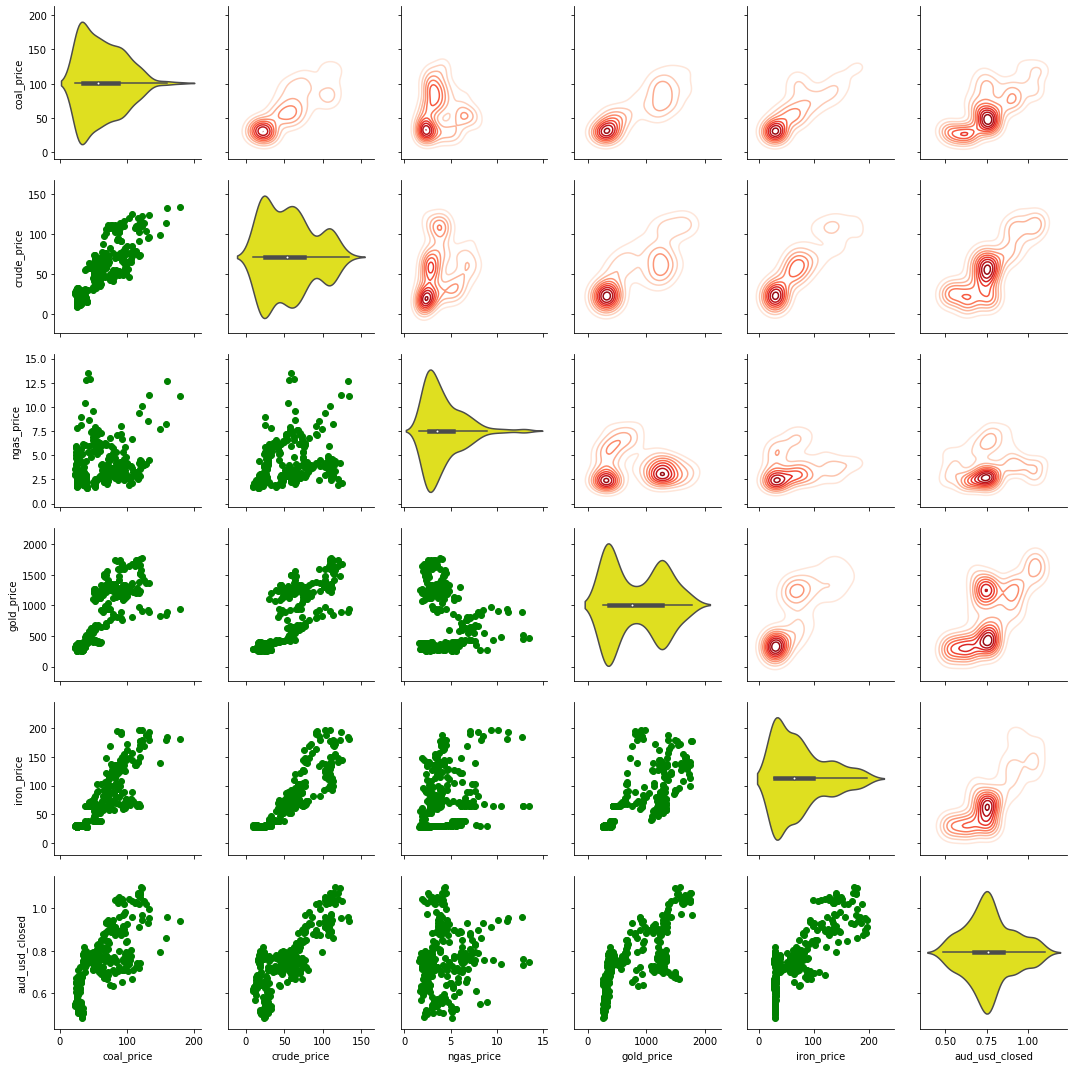

In [85]:
g = sbs.PairGrid(final )
g.map_diag(sbs.violinplot , color = 'Yellow')
g.map_lower(plt.scatter , color = 'green')
g.map_upper(sbs.kdeplot , cmap = 'Reds')

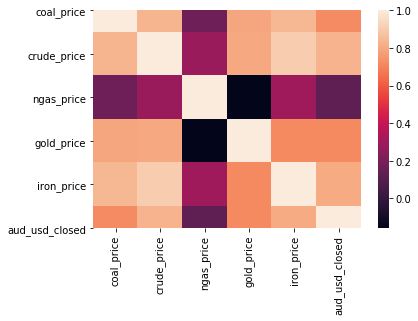

In [89]:
sbs.heatmap(final.corr())

# Autocorrelation and Partial Autocorrelation

-The autocorrelation function (ACF) measures how a series is correlated with itself at different lags.

-The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.


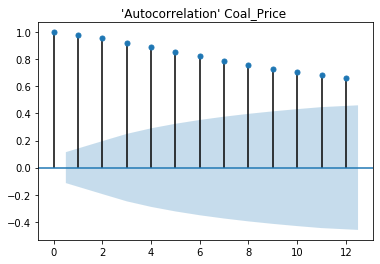

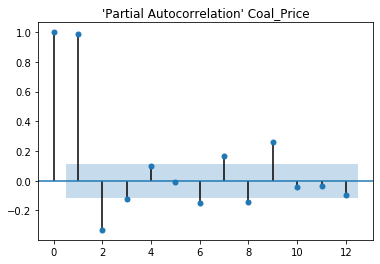

In [90]:
# Autocorrelation 
plot_acf(final["coal_price"],lags=12,title="'Autocorrelation' Coal_Price ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(final["coal_price"],lags=12, title="'Partial Autocorrelation' Coal_Price")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

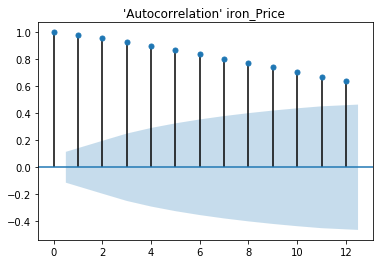

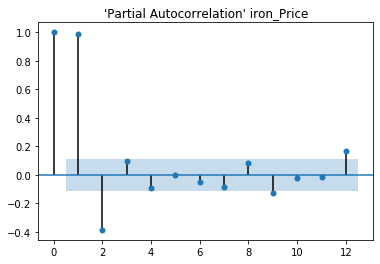

In [91]:
# Autocorrelation 
plot_acf(final["iron_price"],lags=12,title="'Autocorrelation' iron_Price ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(final["iron_price"],lags=12, title="'Partial Autocorrelation' iron_Price")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

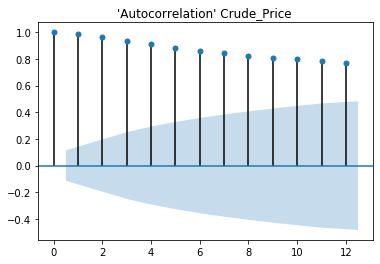

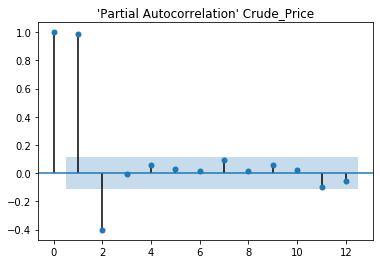

In [92]:
# Autocorrelation 
plot_acf(final["crude_price"],lags=12,title="'Autocorrelation' Crude_Price ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(final["crude_price"],lags=12, title="'Partial Autocorrelation' Crude_Price")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

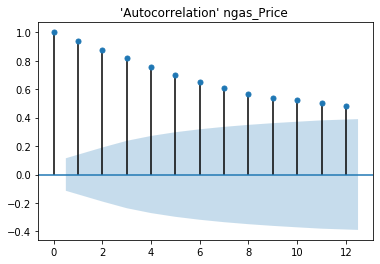

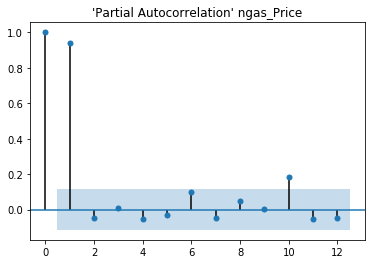

In [93]:
# Autocorrelation 
plot_acf(final["ngas_price"],lags=12,title="'Autocorrelation' ngas_Price ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(final["ngas_price"],lags=12, title="'Partial Autocorrelation' ngas_Price")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

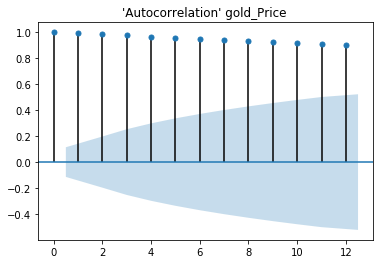

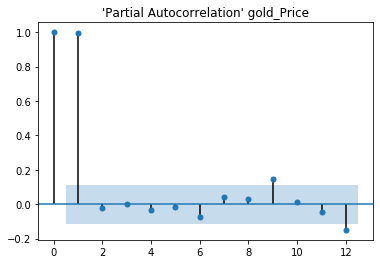

In [94]:
# Autocorrelation 
plot_acf(final["gold_price"],lags=12,title="'Autocorrelation' gold_Price ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(final["gold_price"],lags=12, title="'Partial Autocorrelation' gold_Price")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

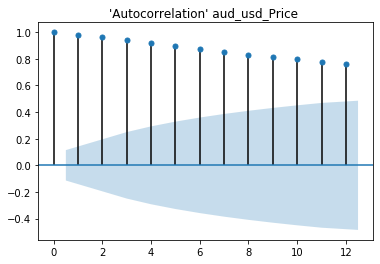

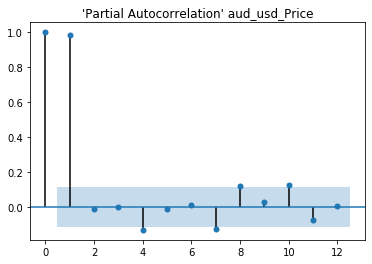

In [95]:
# Autocorrelation 
plot_acf(final["aud_usd_closed"],lags=12,title="'Autocorrelation' aud_usd_Price ")
plt.show()#As all lags are either close to 1, they are statistically significant

# Partial Autocorrelation
plot_pacf(final["aud_usd_closed"],lags=12, title="'Partial Autocorrelation' aud_usd_Price")
plt.show()#Though it is statistically signficant, partial autocorrelation after first 3 lags is very low.

# Time series decomposition

a) Trend : Consistent upwards or downwards slope of a time series

b) Seasonality : Clear periodic pattern of a time series

c) Noise : Outliers or missing values

d) Residuals : Shows if a linear regression model is approriate the data


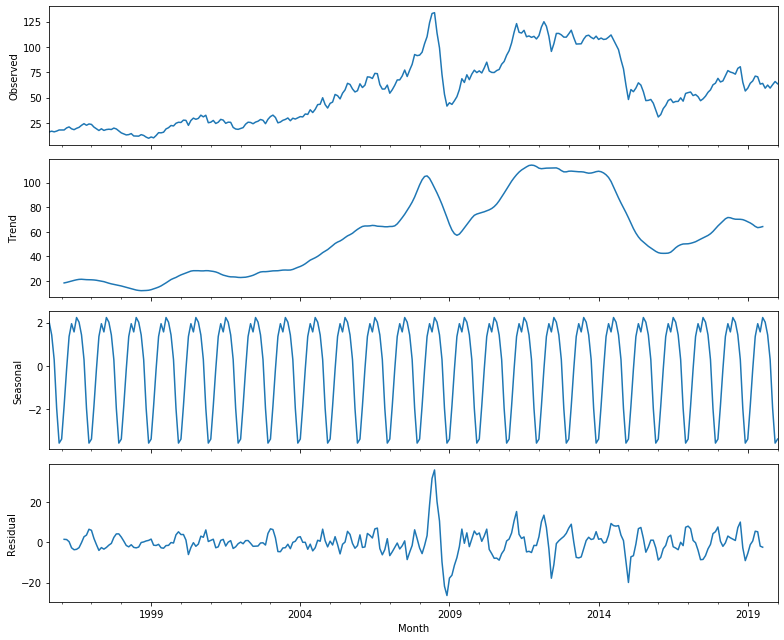

In [96]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 11, 9
decomposed_crude_price = sm.tsa.seasonal_decompose( final['crude_price'] , freq = 12 )
figure = decomposed_crude_price.plot()
plt.show()

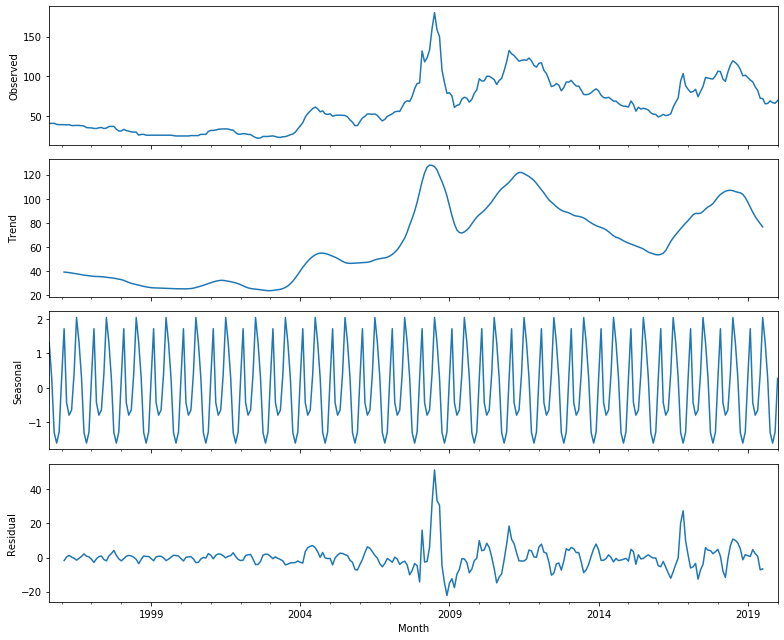

In [97]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 11, 9
decomposed_coal_price = sm.tsa.seasonal_decompose( final['coal_price'] , freq = 12 )
figure = decomposed_coal_price.plot()
plt.show()

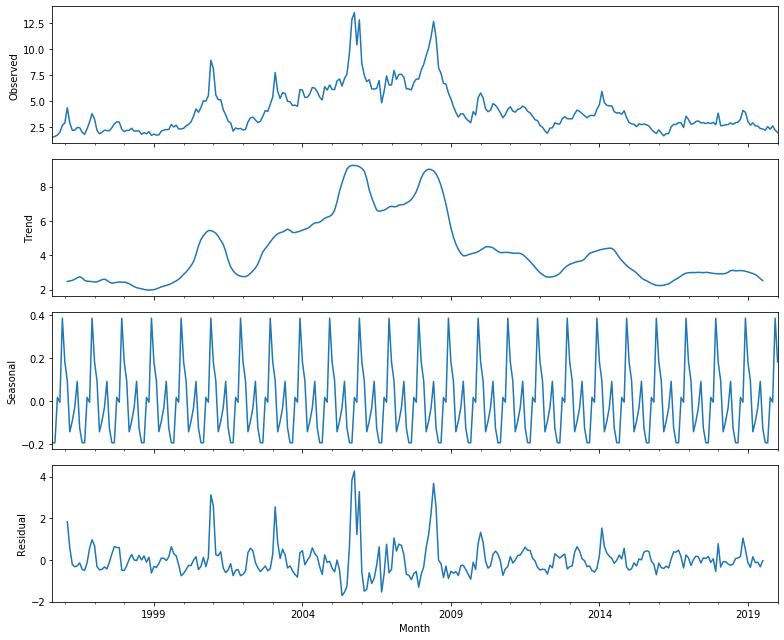

In [98]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 11, 9
decomposed_ngas_price = sm.tsa.seasonal_decompose( final['ngas_price'] , freq = 12 )
figure = decomposed_ngas_price.plot()
plt.show()

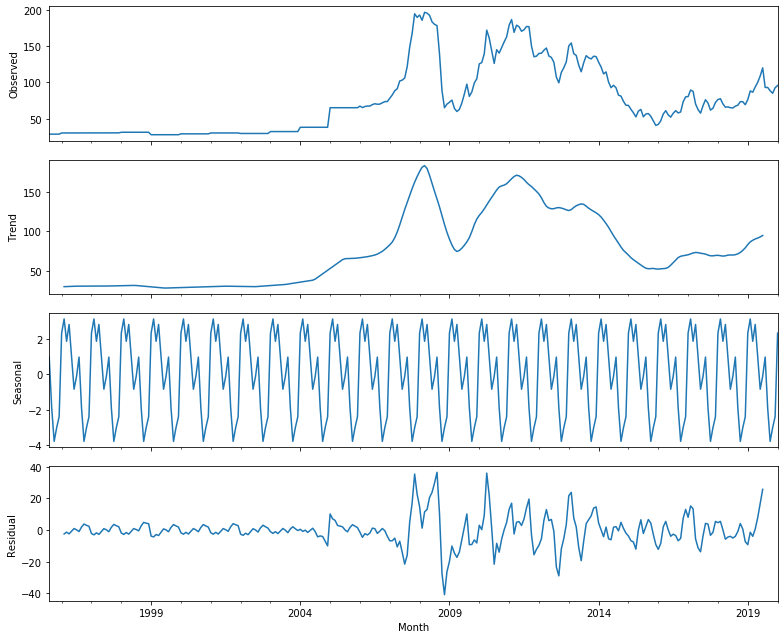

In [99]:
rcParams['figure.figsize'] = 11, 9
decomposed_iron_price = sm.tsa.seasonal_decompose( final['iron_price'] , freq = 12 )
figure = decomposed_iron_price.plot()
plt.show()

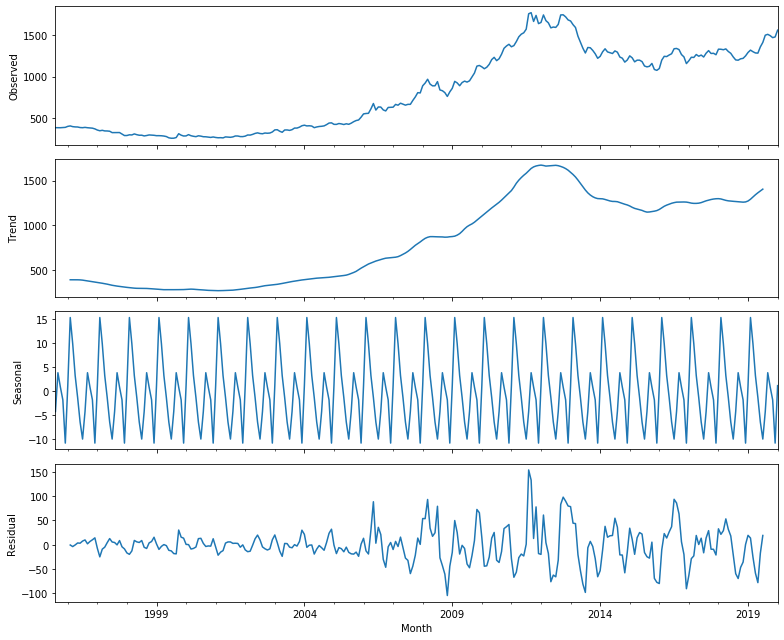

In [100]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 11, 9
decomposed_gold_price = sm.tsa.seasonal_decompose( final['gold_price'] , freq = 12 )
figure = decomposed_gold_price.plot()
plt.show()

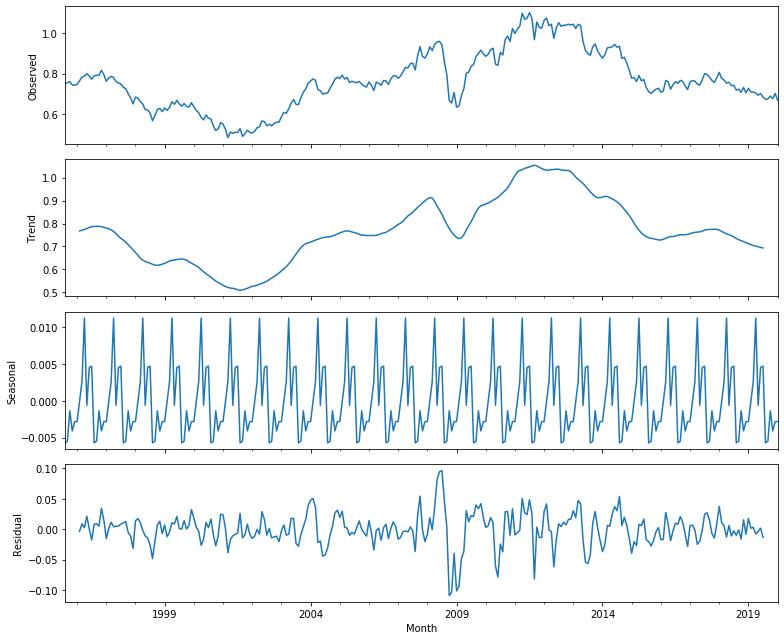

In [101]:
from pylab import rcParams
import statsmodels.api as sm


rcParams['figure.figsize'] = 11, 9
decomposed_aud_usd_closed = sm.tsa.seasonal_decompose( final['aud_usd_closed'] , freq = 12 )
figure = decomposed_aud_usd_closed.plot()
plt.show()

In [102]:
trace1 = go.Scatter(
    x = crude['Month'],
    y = final['crude_price'],
    mode = 'lines',
    name = 'Crude oil')

trace2 = go.Scatter(
    x = crude['Month'],
    y = final['ngas_price']*10,
    mode = 'lines',
    name = 'Natural Gas')

trace3 = go.Scatter(
    x = crude['Month'],
    y = final['gold_price']/10,
    mode = 'lines',
    name = 'Gold')

trace4 = go.Scatter(
    x = crude['Month'],
    y = final['aud_usd_closed']*100,
    mode = 'lines',
    name = 'AUD/USD')

trace5 = go.Scatter(
    x = crude['Month'],
    y = final['coal_price'],
    mode = 'lines',
    name = 'Coal')

trace6 = go.Scatter(
    x = crude['Month'],
    y = final['iron_price'],
    mode = 'lines',
    name = 'iron')


data = [trace1, trace2, trace3, trace4,trace5, trace6]

layout = go.Layout(title = ' Comparisons '
    , barmode = 'group'
    , yaxis=dict(title='Price(USD)')
    , xaxis=dict(title='Year')
    , legend=dict(x=1,y=1)
    )

fig = go.Figure(data=data, layout=layout)
iplot(fig)